<a href="https://colab.research.google.com/github/Rag-gy/path-to-ML/blob/main/pandas_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
myindex=[1,2,3,4]
mydata=[1968,1973,1885,1997]

In [ ]:
a=pd.Series(data=mydata, index=myindex)

print(a)

1    1968
2    1973
3    1885
4    1997
dtype: int64


In [ ]:
b=pd.Series(data=[x for x in range(1,5)],index=myindex)
c=a.add(b,fill_value=0)
print(c)

1    1969
2    1975
3    1888
4    2001
dtype: int64


In [ ]:
np.random.seed(100)
new_data=np.random.randint(0,101,(4,3))

In [ ]:
new_data

array([[ 8, 24, 67],
       [87, 79, 48],
       [10, 94, 52],
       [98, 53, 66]])

In [ ]:
my_row=["mon", "tue", "wed", "turs"]

my_cols=["KOM", "PSP", "PPD"]

b = pd.DataFrame(new_data, index=my_row, columns=my_cols)
b

,KOM,PSP,PPD
mon,8,24,67
tue,87,79,48
wed,10,94,52
turs,98,53,66


In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
f=pd.read_csv('tips.csv')
f

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17


In [ ]:
b.loc["tue"]

KOM    87
PSP    79
PPD    48
Name: tue, dtype: int64

In [ ]:
f.columns#return the coolumns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

In [ ]:
 f.index#return the rows 

In [ ]:
f.head(10)#will print the first ten rows

In [ ]:
f.tail(10)#return the last ten rows

In [ ]:
f.info() #gives info abot the dataframe

In [ ]:
(f.describe()).T#gives mean,min,max values of all numeric datas in the table

In [ ]:
f.head()

In [ ]:
f.drop('tip_percentage', axis=1,inplace=True)#used to delete a row or a column from a csv file. Inplace must be given to save the changes

In [ ]:
f.loc[0:10]#used to access the rows and colmns and s similar to iloc[]

In [ ]:
f.pop('tip_percentage')
f

In [ ]:
f.pop('tip_percentage')#pop fuction returns the col which was deleted and save the changes. this pop function is used to delete only cols

In [ ]:
f.insert(2,'tip_percentage',np.round(f['tip']/f['total_bill']*100,2))
f

In [ ]:
f.head(10)

In [ ]:
f['tip_percentage'][0]

In [ ]:
f.head()

In [ ]:
f=f.set_index('Payment ID')#it is used to set the index or change the index

In [ ]:
f.head()

In [ ]:
f.index

In [ ]:
f=f.reset_index()#this will reset the index by changing the set index as a new column

In [ ]:
f.head()

In [ ]:
f=f.set_index('Payment ID')

In [ ]:
f.head()

In [ ]:
f.loc['Sun2959':'Sun5260']#it givesd output on basis of the label not index

In [ ]:
f=f.drop("Sun4608",axis=0)
f.head()

In [ ]:
f.iloc[1:3]

In [ ]:
# f = f.set_index('total_bill')

f.head()

f = f.reset_index()

f.head()

In [ ]:
f=pd.read_csv('tips.csv')
f.head()

In [ ]:
f[f['sex']=='Male']#this is single condition fitering

In [ ]:
f[((f['sex']=="Male")&(f["tip"]>6))|((f['sex']=="Female")&(f['tip']>5))]#multiple filter condition

In [ ]:
f[(f['day'].isin(["Sat"]))&(f['tip']>6)]#this isin operator is used to find values which satisfy the values in list(similar to an or)

In [ ]:
f=pd.read_csv('tips.csv')

In [ ]:
f.head()

In [ ]:
def last_three(num):
  return int(str(num)[-4:])

def Initial(name):
  return (name[0])

In [ ]:
f.insert(10,'cvv',f['CC Number'].apply(last_three))
f.insert(9,'Initial',f['Payer Name'].apply(Initial))

In [ ]:
f.head()

In [ ]:
f=f.rename(columns={'cvv':"CVV"})

In [ ]:
f.head()

In [ ]:
def review(price):
  if price<10:
    return "$"
  elif price>=10 and price<30:
    return "$$"
  else:
    return "$$$"

In [ ]:
f["Review"]=f['total_bill'].apply(review)

In [ ]:
f.head()

In [ ]:
f[((f['Review']=="$$$")&(f['sex']=='Male')&(f['day']!="Sat")&(f['day']!="Sun")&(f['size']>3)|(f['sex']=="Female"))]

In [ ]:
y=lambda x,y:x+5+y
y(5,10)

In [ ]:
def quality(bill,tip):
  if tip/bill>0.25:
    return 'Generous'
  else:
    return 'Not Generous'

In [ ]:
f["Quality"]=f[['total_bill','tip']].apply(lambda f:quality(f['total_bill'],f['tip']),axis=1)

In [ ]:
f.head()

In [ ]:
f.head()

In [ ]:
f=pd.read_csv('tips.csv')

In [ ]:
def quality(tip,price):
  if tip/price>0.25:
    return "Generous"
  else:
    return "Not Generous"

In [ ]:
f['Quality']=f[['tip','total_bill']].apply(lambda f:quality(f['tip'],f['total_bill']),axis=1)

In [ ]:
f[f['Quality']=="Generous"]

In [ ]:
def tiptop(bill,tip,size):
  if size>3:
    if bill>30 and tip>5:
      return "WOW"
    else:
      return "Not WOW"
  else:
    return "Simbly waste"

In [ ]:
f["remark"]=f[['total_bill','tip','size']].apply(lambda f: tiptop(f['total_bill'],f['tip'],f['size']),axis=1)

In [ ]:
f[f['remark']=="WOW"]

In [ ]:
f=f.drop('remark',axis=1)

In [ ]:
f.head()

In [ ]:
f['remark']=np.vectorize(tiptop)(f['total_bill'],f['tip'],f['size']) #the purpose of numpy vectorize is to transform functios which are not numpy aware

In [ ]:
f.head()

In [ ]:
f.sort_values('tip')

In [ ]:
f.sort_values(['tip','total_bill'],ascending=False)

In [ ]:
f['total_bill'].idxmin()#returns the index of the minimum value of the total bill

In [ ]:
f.iloc[f['total_bill'].idxmin()]#this gives the row with minimum totalbill

In [ ]:
f.corr()#this returns the correlation between the integers in the data

In [ ]:
f['sex'].count()#returns the total count of the values

In [ ]:
f['sex'].value_counts()#returns the count of specific types in the data as Males=157, females=87

In [ ]:
f['size'].value_counts()

In [ ]:
f['size'].unique()#return the unique values

In [ ]:
f['size'].nunique()#returns the number of unique values

In [ ]:
import pandas as pd
import numpy as npm

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
f=pd.read_csv('tips.csv')

f['sex'].value_counts()

In [ ]:
f['sex'].replace(["Female","Male"],["F","M"])#used to replace a single value in a data

In [ ]:
my_map={"Male":"M","Female":"F"}
f['sex']=f['sex'].map(my_map)#this is used to replace a particular value in a row with other value
                             #this accepts only dictionary and is suitable for replacing multiple values in a data

In [ ]:
f.head()

In [ ]:
dd=[1,2,3,2,1]

dd=pd.DataFrame(dd,["a","b","c","d","e"],["MF"])
dd

In [ ]:
dd.duplicated()# returns the boolean True if th evalues are repeated

In [ ]:
dd=dd.drop_duplicates()# drops or delete the duplicate values from the rows
dd

In [ ]:
(f['total_bill']<=20) & (f['total_bill']>=10)

In [ ]:
f['total_bill'].between(10,20,inclusive=True)#returns the values between the given range and inclusive is used if the the end values are also included

In [ ]:
f.sort_values('tip',ascending=False).iloc[0:2]

In [ ]:
f.nsmallest(2,'tip')#this is similar to sort_values but return n values from the sorted order

In [ ]:
f.sample(frac=0.025)

In [ ]:
f.sort_values('tip',ascending=False)

In [ ]:
n=np.array([[1776,None,None,None],[1867,38,1.7,3.86],[1821,126,1.22,0.76]])

In [ ]:
n=pd.DataFrame(n,["USA","CANADA","MEXICO"],["Year","Pop","GDP","Area"])

In [ ]:
n=n.drop("USA")

In [ ]:
n=n.drop("Year",axis=1)

In [ ]:
n

In [ ]:
np.nan

In [ ]:
pd.NA

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
f=pd.read_csv("movie_scores.csv")

In [ ]:
f.isnull()#returns the bool value for null values

In [ ]:
f[(f['pre_movie_score'].isnull())&(f['sex'].notnull())]

In [ ]:
#KEEP DATA
#DROP DATA
#FILL DATA

In [ ]:
help(f.dropna)

In [ ]:
f.dropna(how="all")#used to drop the rows which has all values as Nan

In [ ]:
f.dropna(subset=["sex",'pre_movie_score'])#used to drop the rows which has NaN in the specified columns

In [ ]:
f.dropna(axis=1)#drops the columns which has atleast oneNaN

In [ ]:
f.dropna(axis=1)

In [ ]:
help(f.fillna)

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("movie_scores.csv")

In [ ]:
df

In [ ]:
df[df['pre_movie_score'].notnull()]

In [ ]:
df[df['pre_movie_score'].isnull()&df['sex'].notnull()]

In [ ]:
df.fillna('New Value!')#fills parameter in all places of NA

In [ ]:
df

In [ ]:
df['pre_movie_score']=df['pre_movie_score'].fillna(0)#used to fill a particular column which has NA

In [ ]:
df = pd.read_csv("movie_scores.csv")

In [ ]:
df

In [ ]:
df['pre_movie_score'].mean()#returns the mean of the particular column(only with int)

In [ ]:
df.fillna(df.mean())#this wil;l automatically fill the na in numeric columns with the mean of the column

In [ ]:
airline_tix = {'first':100, 'bussiness':np.nan, 'economy-plus':50, 'economy':30}
ser = pd.Series(airline_tix)

In [ ]:
ser

In [ ]:
ser.interpolate()#fills the NAN in numeric column with a value which is mean of before and after value, mostly preffered for ordered values

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("mpg.csv")

In [ ]:
df.head()

In [ ]:
df.groupby('model_year').mean()#takes model year as index and returns the mean of the other column with numerical value

In [ ]:
df.groupby('model_year').mean()['mpg']#returns only the mean of mpg

In [ ]:
df.groupby('model_year').mean()[['mpg','cylinders', 'weight']] #return the mean of the list elements

In [ ]:
df.groupby(['model_year', 'cylinders']).mean()

In [ ]:
df.groupby(['model_year', 'cylinders']).mean().columns

In [ ]:
df.groupby(['model_year', 'cylinders']).mean()['mpg']

In [ ]:
df.groupby('model_year').describe().head().transpose()

In [ ]:
 yearcyl = df.groupby(['model_year', 'cylinders']).mean()
 yearcyl

In [ ]:
yearcyl.index.names#returns name of the index in the Dataset

In [ ]:
yearcyl.index.levels#return the levels or range of index

In [ ]:
yearcyl.loc[70]#normally looks for the outermost index

In [ ]:
yearcyl.loc[[70,82]]

In [ ]:
yearcyl.loc[(70,4)]#tuple is passed to selecxt the inner index(70,4) in 70th index 4th index

In [ ]:
yearcyl.xs(key=70,level='model_year')#cross section is used to select values only on basis of inner index and it cannot accept list of keys

In [ ]:
yearcyl.xs(key=4, level='cylinders')#in this in the cylinder index the value 4 is selected from all the years

In [ ]:
yearcyl.swaplevel()

In [ ]:
yearcyl.head()

In [ ]:
df.agg(['std','mean'])#used to get the mean and the std dev of the cols(used to get multiple calculated values of the cols)

In [ ]:
df.agg(['std','mean'])['mpg']

In [ ]:
df.agg({'mpg':['max','mean'], 'weight':['mean','min']})#used to get particular cols with specific attributes and it returns NaN for uncalled attributes of the rows

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_one = {'A':['A0', 'A1', 'A2', 'A3'], 'B':['B0','B1','B2','B3']}
data_two = {'C':['C0','C1','C2','C3'], 'D':['D0','D1','D2','D3']}

In [ ]:
one = pd.DataFrame(data_one)
two = pd.DataFrame(data_two)

In [ ]:
one

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [ ]:
two

,C,D
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [ ]:
pd.concat([one,two])#thre is NaN in ther column C & D in first 4 rows because the values of C and D in first Dataset is unavailabe

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


In [ ]:
pd.concat([one,two],axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
two.columns = one.columns#this is used to change the column name of two to columnn name of one

In [ ]:
two

,A,B
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [ ]:
pd.concat([one,two], ignore_index=True, sort = False)#the ignore_index is used to ignore the indexes of the DataFrames and create a new index

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,C0,D0
5,C1,D1
6,C2,D2
7,C3,D3


In [ ]:
reg = pd.DataFrame({'reg_id':[1,2,3,4],'name':['Andrew','Bobo','Claire','David']})
log = pd.DataFrame({'log_id':[1,2,3,4],'name':['Xavier','Andrew','Yolanda','Bobo']})

In [ ]:
reg

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [ ]:
log

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [ ]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    Parameters
    ----------
    left : DataFrame
  

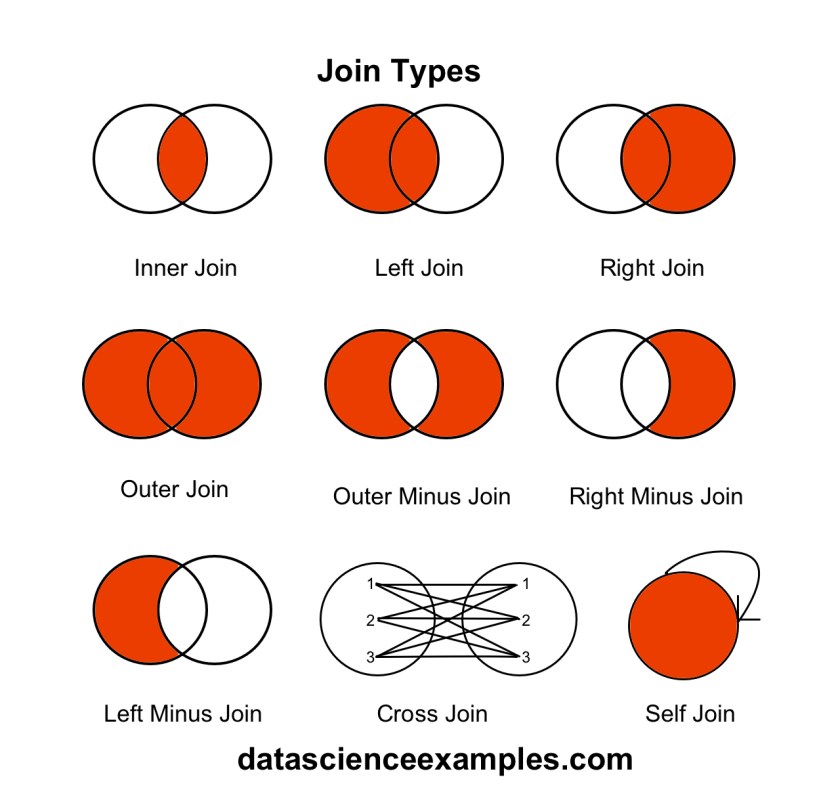

**Check the above image for clear understanding if the how types in merge fucntion**

In [ ]:
pd.merge(reg,log,how='inner',on='name')#inner stands for interesection as in a pie diagram and it searches for common values of names in both dataframe

,reg_id,name,log_id
0,1,Andrew,2
1,2,Bobo,4


In [ ]:
pd.merge(reg, log, how='left', on='name')#order of the table is important in left or right merge

,reg_id,name,log_id
0,1,Andrew,2.0
1,2,Bobo,4.0
2,3,Claire,NaN
3,4,David,NaN


In [ ]:
pd.merge(reg, log, how='right', on='name')

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bobo,4


In [ ]:
pd.merge(reg,log,how='outer',on='name')
#this gives all thev values in both the DataFrame

,reg_id,name,log_id
0,1.0,Andrew,2.0
1,2.0,Bobo,4.0
2,3.0,Claire,NaN
3,4.0,David,NaN
4,NaN,Xavier,1.0
5,NaN,Yolanda,3.0


In [ ]:
rg = reg.set_index('name')

In [ ]:
rg

,reg_id
name,
Andrew,1
Bobo,2
Claire,3
David,4


In [ ]:
pd.merge(rg,log,left_index=True,right_on='name',how='inner')
#here we're using the index of the left DataFraame and the name of the right DataFrame

,reg_id,log_id,name
1,1,2,Andrew
3,2,4,Bobo


In [ ]:
rg = rg.reset_index()
rg.columns = ['reg_name','red_id']
rg

,reg_name,red_id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


In [ ]:
pd.merge(rg,log,left_on='reg_name',right_on='name',how='inner')
#used to select specific columns on left and right DataFrame

,reg_name,red_id,log_id,name
0,Andrew,1,2,Andrew
1,Bobo,2,4,Bobo


In [ ]:
reg

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [ ]:
reg.columns = ['id','name']
log.columns = ['id','name']

In [ ]:
reg

,id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [ ]:
pd.merge(reg,log,how='inner',on='name')
#the python automatically suffixes the similar column names with a variable wich can be changed)

,id_x,name,id_y
0,1,Andrew,2
1,2,Bobo,4


In [ ]:
pd.merge(reg,log,how='inner',on='name',suffixes = ('_reg','_log'))
#here we have changed the suffixes of the two ids wiht our own custom suffixes

,id_reg,name,id_log
0,1,Andrew,2
1,2,Bobo,4


In [ ]:
email = 'raghulprasanthk@gmail.com'
email.split('gmail')

['raghulprasanthk@', '.com']

In [ ]:
name = pd.Series(index=[x for x in range(1,6)], data = ['andrew', 'bobo','claire','david','5'])
name

1    andrew
2      bobo
3    claire
4     david
5         5
dtype: object

In [ ]:
name[name.str.isalpha()]

1    andrew
2      bobo
3    claire
4     david
dtype: object

In [ ]:
tech = ['GOOG,APPL,AMZN','JPM,BAC,GS']
tic = pd.Series(tech)

In [ ]:
tic.str.split(',',expand=True)
#the expand method in the str is used to expand th splitted values in to an element in a DataFrame

,0,1,2
0,GOOG,APPL,AMZN
1,JPM,BAC,GS


In [ ]:
messy_names = pd.Series(['andrew   ','bo;bo', '  Claire  '])
messy_names.str.strip().str.replace(';','').str.capitalize()
#strip function is used to remove only chareacters from beginning and end
#use .str beforee a function to take it as a string and work on it

0    Andrew
1      Bobo
2    Claire
dtype: object

In [ ]:
from datetime import datetime as dt

In [ ]:
myser = pd.Series(['Nov 3,1991','2002-12-01',None])
myser

0    Nov 3,1991
1    2002-12-01
2          None
dtype: object

In [ ]:
timeseri = pd.to_datetime(myser)

In [ ]:
timeseri

0   1991-11-03
1   2002-12-01
2          NaT
dtype: datetime64[ns]

In [ ]:
pd.to_datetime('01-12-2002',dayfirst=True)#to make sure the date is given first and the month is given second

Timestamp('2002-12-01 00:00:00')

In [ ]:
style_date = '19--Dec--2002'
pd.to_datetime(style_date,format='%d--%b--%Y')

Timestamp('2002-12-19 00:00:00')

In [ ]:
 custom_date = "1st of Dec 2002"
 pd.to_datetime(custom_date)

Timestamp('2002-12-01 00:00:00')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
f = pd.read_csv('sample_data/RetailSales_BeerWineLiquor.csv')

In [ ]:
f.head()

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [ ]:
f = pd.read_csv('sample_data/RetailSales_BeerWineLiquor.csv', parse_dates=[0])

In [ ]:
f['DATE']

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
335   2019-12-01
336   2020-01-01
337   2020-02-01
338   2020-03-01
339   2020-04-01
Name: DATE, Length: 340, dtype: datetime64[ns]

In [ ]:
f = f.set_index('DATE')

In [ ]:
f.resample(rule='A').mean()
#resample is more like a groupby but with time stamp
# in the rule="A" it is used to groupby year mean, theres other rule in internet

,MRTSSM4453USN
DATE,
1992-12-31,1807.250000
1993-12-31,1794.833333
1994-12-31,1841.750000
1995-12-31,1833.916667
1996-12-31,1929.750000
1997-12-31,2006.750000
1998-12-31,2115.166667
1999-12-31,2206.333333
2000-12-31,2375.583333


In [ ]:
pwd

'/content'

In [ ]:
ls

sample_data/


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving example.csv to example.csv


In [ ]:
df = pd.read_csv('example.csv',header=None)
df
#header = None if given will  keep the index as an element and give a default coulmn

,0,1,2,3
0,a,b,c,d
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15


In [ ]:
df

,0,1,2,3
0,a,b,c,d
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15


In [ ]:
df.to_csv('sample_data/new_file.csv')

In [ ]:
url = "https://en.wikipedia.org/wiki/World_population"
tables = pd.read_html(url)

In [ ]:
len(tables)

26

In [ ]:
tt = tables[0]
tt

World population (millions, UN estimates)[15]  ...                                                   
                                                    #  ...                                            2030[A]
0                                                   1  ...                                               1416
1                                                   2  ...                                               1528
2                                                   3  ...                                                356
3                                                   4  ...                                                295
4                                                   5  ...                                                245
5                                                   6  ...                                                228
6                                                   7  ...                                                263
7                                                   8  ...                                                186
8                                                   9  ...                                                149
9                                                  10  ...                                                148
10                                                NaN  ...                                               8501
11  Notes: .mw-parser-output .reflist{font-size:90...  ...  Notes: .mw-parser-output .reflist{font-size:90...

[12 rows x 5 columns]

In [ ]:
tt = tt['World population (millions, UN estimates)[15]']

In [ ]:
tt

,#,Top ten most populous countries,2000,2015,2030[A]
0,1,China[B],1270,1376,1416
1,2,India,1053,1311,1528
2,3,United States,283,322,356
3,4,Indonesia,212,258,295
4,5,Pakistan,136,208,245
5,6,Brazil,176,206,228
6,7,Nigeria,123,182,263
7,8,Bangladesh,131,161,186
8,9,Russia,146,146,149
9,10,Mexico,103,127,148


In [ ]:
tt =  tt.drop(11,axis = 0)

In [ ]:
tt = tt.drop('#',axis=1)

In [ ]:
tt.loc[0].at['Top ten most populous countries'] = "China"

In [ ]:
#tt.loc[0][0] == tt.loc[0].at['Top ten most populous countries']
#these two are similar

'1270'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving my_excel_file.xlsx to my_excel_file.xlsx


In [ ]:
f = pd.read_excel('my_excel_file.xlsx',sheet_name='First_Sheet')
f

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [ ]:
wb = pd.ExcelFile('my_excel_file.xlsx')
wb.sheet_names

['First_Sheet']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sales_Funnel_CRM.csv to Sales_Funnel_CRM.csv


In [ ]:
f = pd.read_csv('Sales_Funnel_CRM.csv')
f

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review
6,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Prediction,150,700000,Presented
7,1216870,Microsoft,Will Grates,Edward Thorp,Tracking,300,350000,Under Review
8,2200450,Walmart,Will Grates,Edward Thorp,Analytics,150,2450000,Lost
9,405886,Apple,Cindy Phoner,Claude Shannon,Analytics,300,4550000,Won


In [ ]:
help(pd.pivotm)

Help on function pivot in module pandas.core.reshape.pivot:

pivot(data: 'DataFrame', index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, values: 'IndexLabel | None' = None) -> 'DataFrame'
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    data : DataFrame
    index : str or object or a list of str, optional
        Column to use to make new frame's index. If None, uses
        existing index.
    
        .. versionchanged:: 1.1.0
           Also accept list of index names.
    
    columns : str or object or a list of str
        Column to use to make new fra

In [ ]:
f

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review
6,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Prediction,150,700000,Presented
7,1216870,Microsoft,Will Grates,Edward Thorp,Tracking,300,350000,Under Review
8,2200450,Walmart,Will Grates,Edward Thorp,Analytics,150,2450000,Lost
9,405886,Apple,Cindy Phoner,Claude Shannon,Analytics,300,4550000,Won


In [ ]:
lisence = f[['Company','Product','Licenses']]

In [ ]:
pd.pivot(lisence,index = 'Company',columns = 'Product', values='Licenses')

Product,Analytics,GPS Positioning,Prediction,Tracking
Company,,,,
Google,150.0,NaN,150.0,300.0
ATT,NaN,NaN,150.0,150.0
Apple,300.0,NaN,NaN,NaN
BOBO,150.0,NaN,NaN,NaN
CVS Health,NaN,NaN,NaN,450.0
Cisco,300.0,300.0,NaN,NaN
Exxon Mobile,150.0,NaN,NaN,NaN
IKEA,300.0,NaN,NaN,NaN
Microsoft,NaN,NaN,NaN,300.0


In [ ]:
f.groupby('Company').sum()[['Licenses','Sale Price']]

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [ ]:
pd.pivot_table(f,index=['Account Manager','Contact'],values=['Sale Price'],aggfunc='sum')

Sale Price
Account Manager Contact                 
Claude Shannon  Cindy Phoner     7700000
                Emma Gordian    12390000
Edward Thorp    Elon Tusk        8050000
                Larry Pager      5600000
                Will Grates      2800000

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
f = pd.read_csv('hotel_booking_data.csv')

len(f.rows)

In [ ]:
f[f.isna()]

In [ ]:
f.drop()